In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import sklearn.datasets
from sklearn.metrics.pairwise import euclidean_distances
import math
import random

In [28]:
def generateRandomGraph(num_nodes, num_edges):
    # Generate a random graph
    G = nx.gnm_random_graph(num_nodes, num_edges)

    # Ensure all nodes have at least degree 1
    for node in G.nodes:
        if G.degree[node] == 0:
            # Find a random node to connect with
            target = random.choice(list(G.nodes))
            while target == node or G.has_edge(node, target):
                target = random.choice(list(G.nodes))
            G.add_edge(node, target)
    return G

In [29]:
randomG = generateRandomGraph(10,15)
randomG.edges

EdgeView([(0, 8), (0, 3), (0, 1), (0, 2), (2, 9), (2, 5), (3, 6), (3, 9), (4, 9), (4, 5), (4, 7), (5, 6), (5, 7), (6, 7), (7, 8)])

In [30]:
(0,4) in randomG.edges

False

In [31]:
generateProbabilityList(randomG)

[0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 9]

In [18]:
def generateProbabilityList(G : nx.Graph):
    probList = []
    for node in G.nodes:
        for _ in range(0, G.degree[node]):
            probList.append(node)
    return probList

# n wanted nodes, m edges for new n
def BAModel(G : nx.Graph, n, m):
    random.seed()
    while len(G.nodes) < n:
        probList = generateProbabilityList(G)
        currentNode = len(G.nodes)
        G.add_node(currentNode) # Add new node with index of len G.nodes
        for i in range(0,m):
            # Need to add check for same edges or multiple edges
            rIndex = random.randint(0,len(probList) - 1)
            while (currentNode, probList[rIndex]) in G.edges: # Generate new nodes to connect to till you find edge that doesnt exist yet
                rIndex = random.randint(0,len(probList) - 1)
            G.add_edge(currentNode, probList[rIndex])
    return G


In [32]:
BAGraph2 = randomG.copy()
BAGraph2 = BAModel(BAGraph2, 550, 2)

In [33]:
BAGraph2.edges

EdgeView([(0, 8), (0, 3), (0, 1), (0, 2), (0, 10), (0, 17), (0, 18), (0, 26), (0, 48), (0, 68), (0, 74), (0, 83), (0, 107), (0, 142), (0, 145), (0, 149), (0, 157), (0, 195), (0, 214), (0, 277), (0, 292), (0, 344), (0, 388), (0, 390), (0, 459), (0, 474), (1, 254), (1, 324), (1, 325), (1, 484), (2, 9), (2, 5), (2, 12), (2, 14), (2, 21), (2, 28), (2, 36), (2, 38), (2, 39), (2, 40), (2, 49), (2, 54), (2, 62), (2, 77), (2, 79), (2, 103), (2, 105), (2, 138), (2, 153), (2, 176), (2, 181), (2, 200), (2, 212), (2, 239), (2, 248), (2, 250), (2, 269), (2, 286), (2, 292), (2, 319), (2, 380), (2, 383), (2, 385), (2, 436), (2, 451), (2, 492), (2, 518), (3, 6), (3, 9), (3, 67), (3, 184), (3, 316), (3, 420), (4, 9), (4, 5), (4, 7), (4, 15), (4, 37), (4, 51), (4, 97), (4, 404), (4, 415), (5, 6), (5, 7), (5, 22), (5, 24), (5, 31), (5, 41), (5, 52), (5, 58), (5, 64), (5, 77), (5, 78), (5, 99), (5, 121), (5, 125), (5, 135), (5, 137), (5, 144), (5, 187), (5, 217), (5, 328), (5, 354), (5, 362), (5, 514), (5

In [34]:
nx.spring_layout(BAGraph2)

{0: array([-0.20245145, -0.00488393]),
 1: array([-0.12890136, -0.40732509]),
 2: array([0.12227918, 0.05504365]),
 3: array([-0.22955886,  0.31109735]),
 4: array([-0.1001855,  0.1565854]),
 5: array([-0.17368971,  0.06374574]),
 6: array([-0.10204213,  0.0862729 ]),
 7: array([-0.19520462, -0.09084688]),
 8: array([0.02669866, 0.19156744]),
 9: array([-0.11375029,  0.16620062]),
 10: array([0.19213334, 0.05722343]),
 11: array([0.11358457, 0.07646549]),
 12: array([ 0.26557311, -0.00520375]),
 13: array([ 0.25258514, -0.25574109]),
 14: array([0.29676992, 0.12633036]),
 15: array([-0.18391493, -0.25608194]),
 16: array([-0.2204302 , -0.18368764]),
 17: array([-0.0898674 , -0.24147189]),
 18: array([-0.15310286, -0.16386485]),
 19: array([0.37128368, 0.11530618]),
 20: array([ 0.04095175, -0.20682086]),
 21: array([-0.12618198, -0.31827605]),
 22: array([0.06354449, 0.28983417]),
 23: array([ 0.09064559, -0.1106056 ]),
 24: array([-0.26552159, -0.26452589]),
 25: array([-0.07840034, -

In [35]:
def drawGraph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes

    # Draw the nodes with community-based colors
    nx.draw_networkx_nodes(G, pos, cmap=plt.cm.rainbow, node_size=300)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Add labels (optional)
    nx.draw_networkx_labels(G, pos)

    plt.title('Graph with Communities')
    plt.show()

d:\Anaconda\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


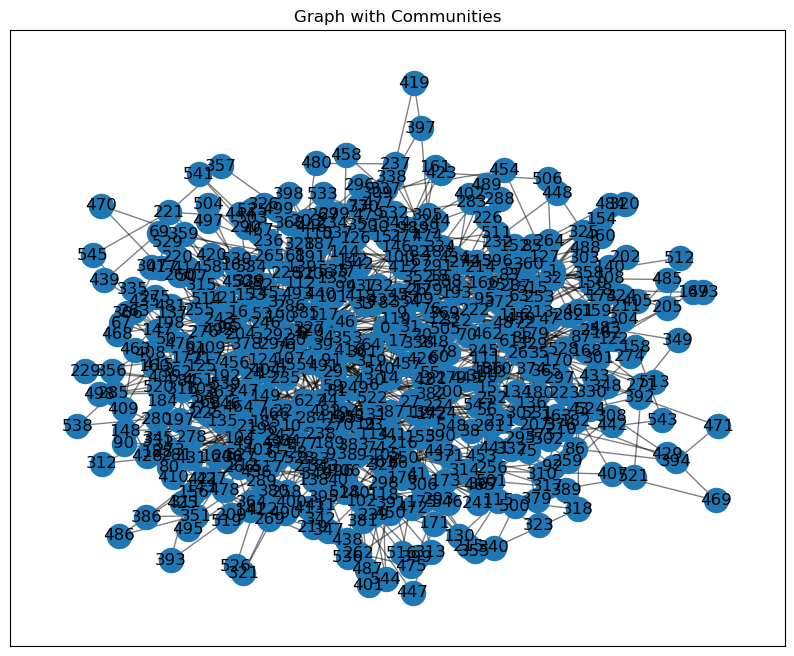

In [36]:
drawGraph(BAGraph2)

In [37]:
BAGraph3 = randomG.copy()
BAGraph3 = BAModel(BAGraph3, 550, 3)

In [38]:
def save_graph_as_table(list_of_graphs):
    """
    Create a table with various graph properties for each graph in the list.
    """
    values = []
    for (G,m) in list_of_graphs:
        # Number of nodes and edges
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        
        # Average degree
        avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
        
        # Density
        density = nx.density(G)
        
        # Connected components
        components = [len(c) for c in nx.connected_components(G)]
        num_components = len(components)
        largest_component_size = max(components) if components else 0
        
        # Diameter of the largest component (if applicable)
        if num_components > 1:
            largest_component = max(nx.connected_components(G), key=len)
            subgraph = G.subgraph(largest_component)
            diameter = nx.diameter(subgraph) if nx.is_connected(subgraph) else float('inf')
        else:
            diameter = nx.diameter(G) if nx.is_connected(G) else float('inf')
        
        # Average path length (computed per component)
        try:
            avg_path_length = nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            avg_path_length = float('inf')
        
        # Clustering coefficient
        clustering_coefficient = nx.average_clustering(G)
        
        # Degree distribution (list of degrees of all nodes)
        degree_distribution = [d for _, d in G.degree()]
        
        # Community structure
        communities = list(nx.community.greedy_modularity_communities(G))
        modularity = nx.algorithms.community.modularity(G, communities)
        
        # Centralities
        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        
        # Adding all data to a dictionary for the table row
        values.append({
            "Vrcholy": num_nodes,
            "Hrany": num_edges,
            "M": m,
            "Průměrný stupeň": avg_degree,
            "Hustota": density,
            "Komponenty": num_components,
            "Velikosti komponentů": components,
            "Největší velikost komponentu": largest_component_size,
            "Průměr": diameter,
            "Průměrná délka cesty": avg_path_length,
            "Clustering Coefficient": clustering_coefficient,
            "Distribuce stupňů": degree_distribution,
            "Modularita": modularity,
            "Degree Centrality": degree_centrality,
            "Betweenness Centrality": betweenness_centrality
        })
    
    # Convert the list of dictionaries into a pandas DataFrame for tabular representation
    table = pd.DataFrame(values)
    display(table)
    
    table.to_csv("graph_metricsBA.csv", index=False)

In [39]:
save_graph_as_table([(BAGraph2,2), (BAGraph3,3)])

,Vrcholy,Hrany,M,Průměrný stupeň,Hustota,Komponenty,Velikosti komponentů,Největší velikost komponentu,Průměr,Průměrná délka cesty,Clustering Coefficient,Distribuce stupňů,Modularita,Degree Centrality,Betweenness Centrality
0,550,1095,2,3.981818,0.007253,1,[550],550,7,3.930631,0.029162,"[26, 5, 38, 7, 9, 27, 33, 32, 27, 28, 18, 21, ...",0.515141,"{0: 0.04735883424408015, 1: 0.0091074681238615...","{0: 0.09580422584051876, 1: 0.0086958243375968..."
1,550,1635,3,5.945455,0.010830,1,[550],550,6,3.331512,0.031503,"[49, 4, 15, 42, 17, 22, 57, 18, 14, 40, 31, 42...",0.378549,"{0: 0.08925318761384335, 1: 0.0072859744990892...","{0: 0.09338685377274467, 1: 0.0016158571504805..."
